In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/anscombe.csv
/kaggle/input/housing/housing.csv


In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [129]:
import warnings
warnings.filterwarnings("ignore")

In [130]:
dataset = pd.read_csv("/kaggle/input/housing/housing.csv")

# DATA EXPLORATION

In [131]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [132]:
print(dataset.shape)

(20640, 10)


In [133]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [135]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [136]:
dataset.dropna(inplace = True)

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [138]:
X = dataset.drop("median_house_value",axis=1)
y= dataset['median_house_value']

In [139]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [140]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
train_data = X_train.join(y_train)

In [143]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19566,-120.96,37.61,23.0,3497.0,887.0,2467.0,816.0,1.9444,INLAND,93400.0
7292,-118.22,33.98,34.0,2225.0,753.0,2980.0,736.0,1.6685,<1H OCEAN,128800.0
17618,-121.94,37.28,27.0,2859.0,464.0,1144.0,430.0,5.0822,<1H OCEAN,327500.0
17518,-121.91,37.34,35.0,2189.0,607.0,1193.0,562.0,2.8042,<1H OCEAN,240900.0
5172,-118.28,33.95,41.0,835.0,208.0,707.0,192.0,1.4103,<1H OCEAN,86200.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


In [144]:
sns.set_palette("RdPu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

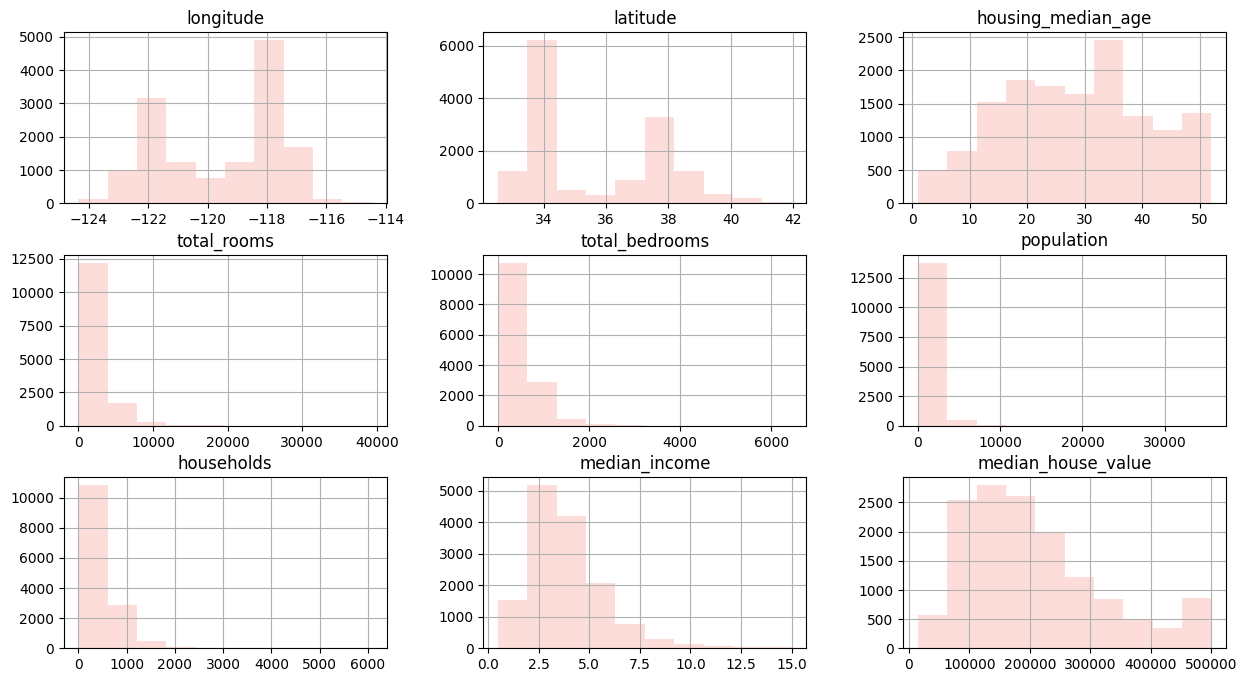

In [145]:
train_data.hist(figsize=(15,8))

Text(0.5, 1.0, 'Correlation Heatmap')

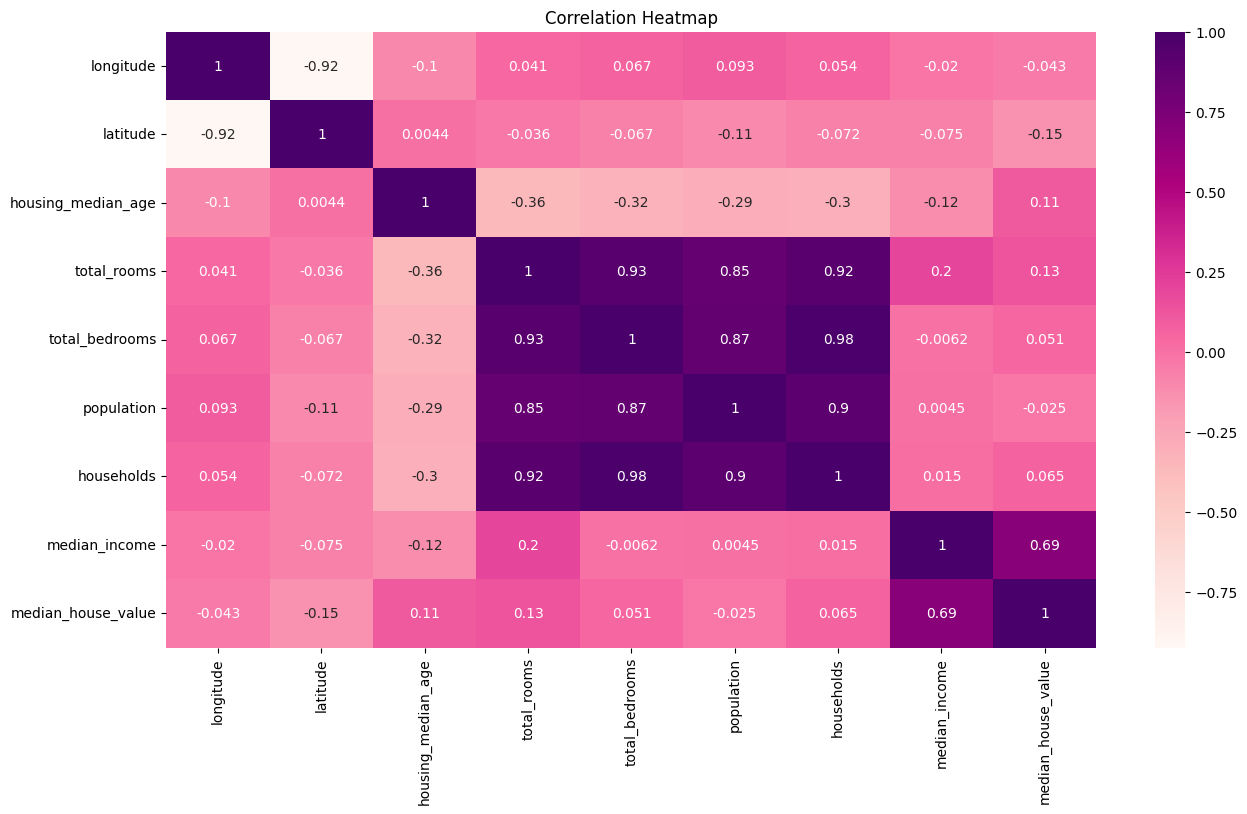

In [146]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True, cmap="RdPu")
plt.title('Correlation Heatmap')

# PREPROCESSING

In [147]:
#To make see whats the distribution would look like (normal distributing)

train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

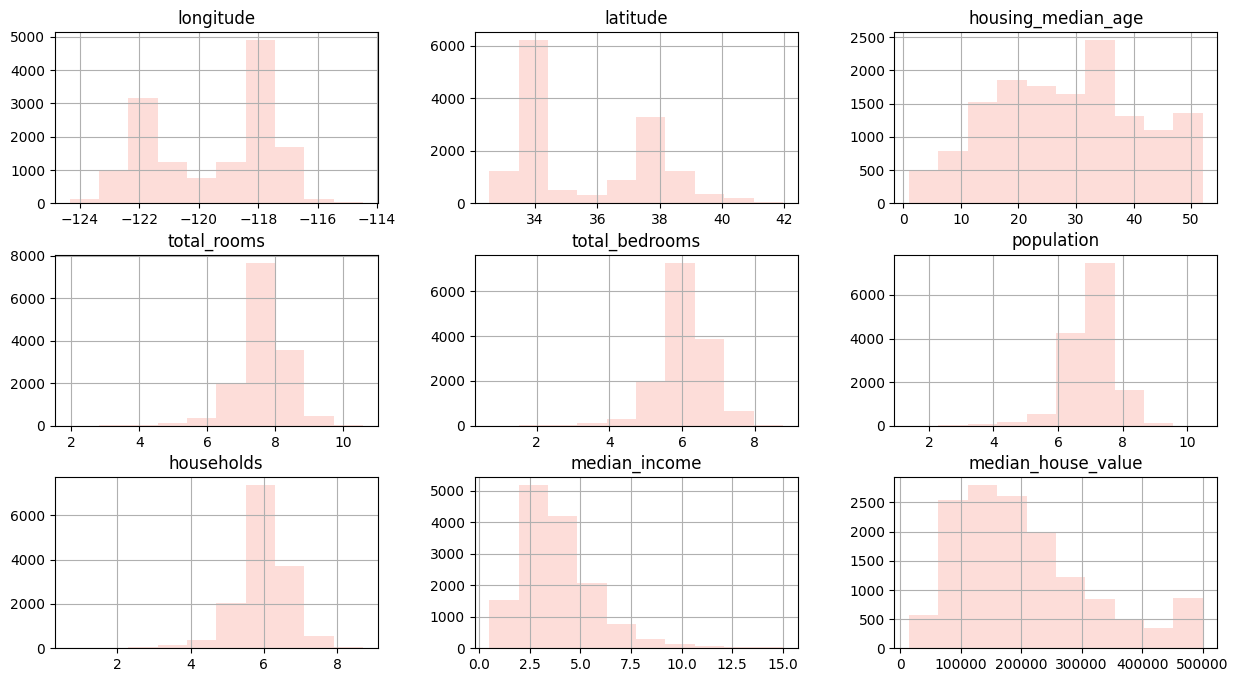

In [148]:
train_data.hist(figsize=(15,8)) #check that data is bell curved 

In [149]:
# making the ocean_proximity numerical since we assumed it might be effective to the prediction 
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(bool).astype(int)).drop(['ocean_proximity'], axis=1)

In [150]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19566,-120.96,37.61,23.0,8.159947,6.788972,7.811163,6.705639,1.9444,93400.0,0,1,0,0,0
7292,-118.22,33.98,34.0,7.707962,6.625392,8.000014,6.602588,1.6685,128800.0,1,0,0,0,0
17618,-121.94,37.28,27.0,7.958577,6.142037,7.043160,6.066108,5.0822,327500.0,1,0,0,0,0
17518,-121.91,37.34,35.0,7.691657,6.410175,7.085064,6.333280,2.8042,240900.0,1,0,0,0,0
5172,-118.28,33.95,41.0,6.728629,5.342334,6.562444,5.262690,1.4103,86200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


Text(0.5, 1.0, 'Correlation Heatmap')

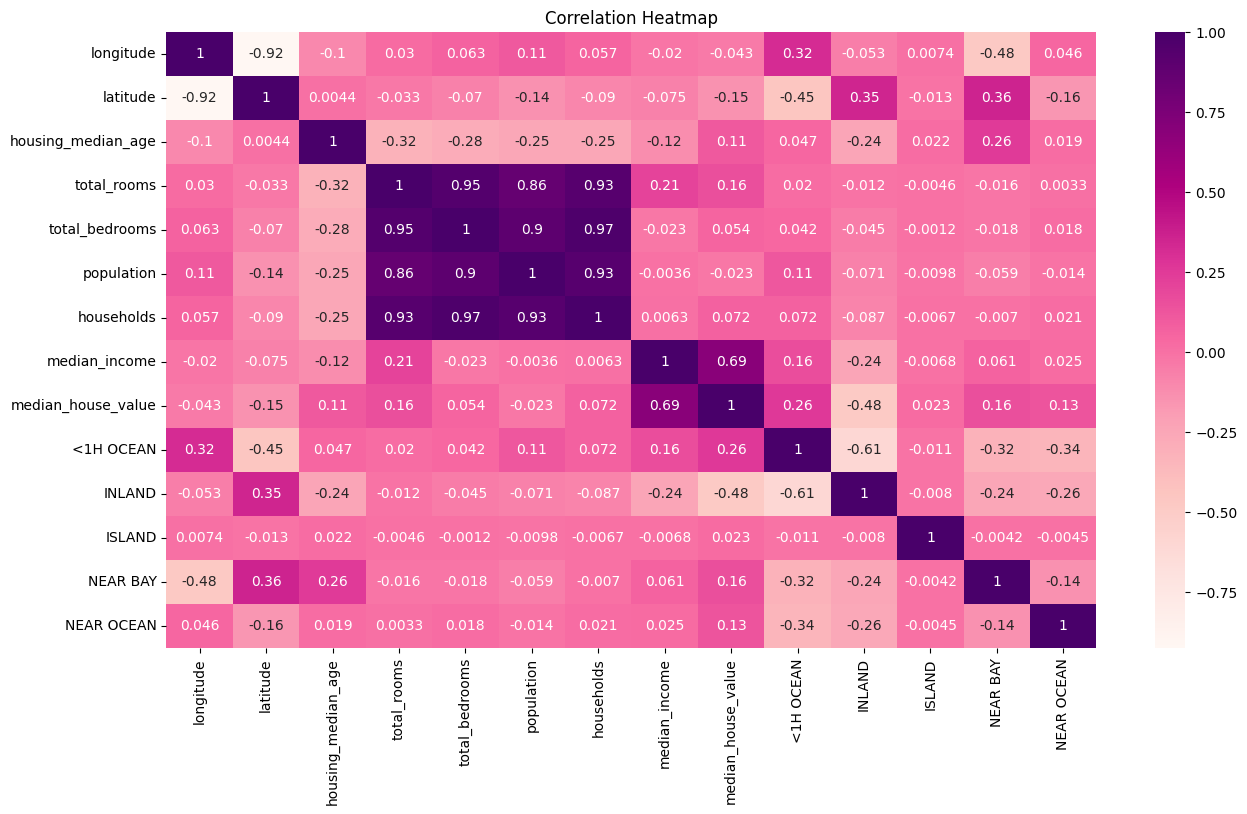

In [151]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True, cmap="RdPu" )
plt.title('Correlation Heatmap')

<Axes: xlabel='latitude', ylabel='longitude'>

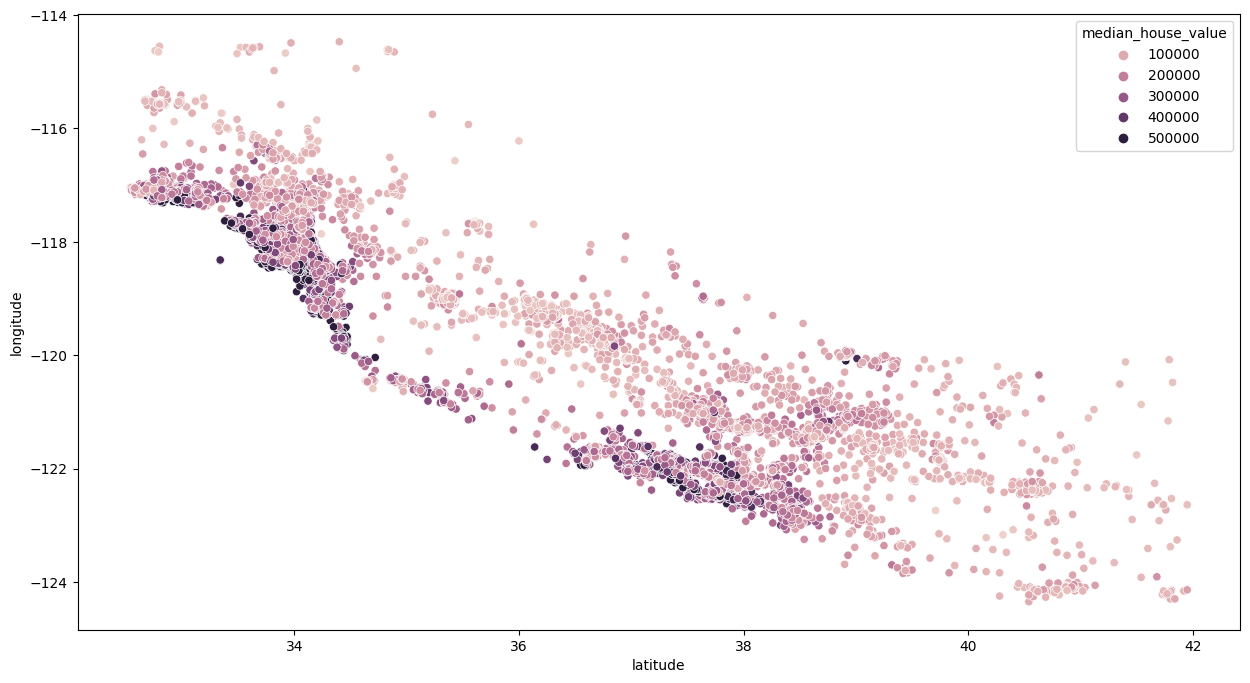

In [152]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data = train_data, hue="median_house_value")
# you can see the houses closer to the coast are more expensive

In [153]:
# adding features 
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

Text(0.5, 1.0, 'Correlation Heatmap')

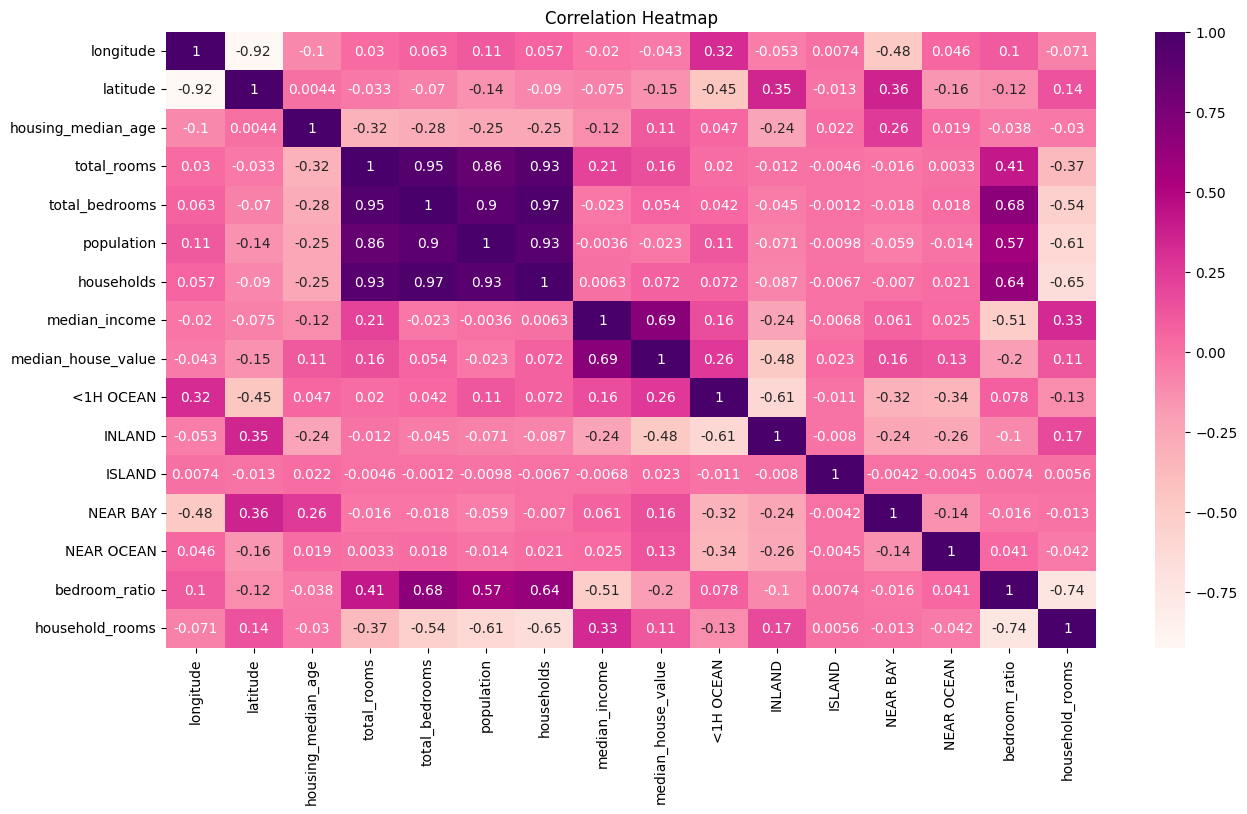

In [154]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot = True, cmap="RdPu" )
plt.title('Correlation Heatmap')

# LINEAR REGRESSION MODEL

In [155]:
from sklearn.linear_model import LinearRegression
X_train, y_train =train_data.drop("median_house_value",axis=1),train_data['median_house_value']
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_s,y_train)

LinearRegression()

In [156]:
# For test (not good practice)

test_data = X_test.join(y_test)
# To make see whats the distribution would look like (normal distributing)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

# making the ocean_proximity numerical since we assumed it might be effective to the prediction 
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(bool).astype(int)).drop(['ocean_proximity'], axis=1)

# adding features 
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, y_test =test_data.drop("median_house_value",axis=1),test_data['median_house_value']
X_test_s = scaler.transform(X_test)

In [157]:
y_pred = model.predict(X_test_s)

In [158]:
model.score(X_train_s, y_train)

0.6690531747172537

In [159]:
model.score(X_test_s, y_test)

0.6754214998898806

# LOSS-FUNCTION

In [160]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [161]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 4326934055.66
Mean Absolute Error: 47880.20
R-squared: 0.68


# LASSO REGULARIZATION 


In [162]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
scores_lasso = []
for alpha in [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso_reg = Lasso(alpha=alpha, max_iter=10, tol=0.1)
    lasso_reg.fit(X_train_s,y_train)
    y_pred_lasso = lasso_reg.predict(X_test_s)
    scores_lasso.append(lasso_reg.score(X_test_s, y_test))

In [163]:
scores_lasso

[0.6654687907973389,
 0.6654687698633619,
 0.6654685605084898,
 0.665466465449554,
 0.665445363838757,
 0.6654215955610625,
 0.6653482567691869]

# RIDGE REGULARIZATION 


In [164]:
from sklearn.linear_model import Ridge
scores_rid = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]:
    ridge_reg = Ridge(alpha=alpha, max_iter=10, tol=0.1)
    ridge_reg.fit(X_train_s,y_train)
    y_pred_reg = ridge_reg.predict(X_test_s)
    scores_rid.append(ridge_reg.score(X_test_s, y_test))


In [165]:
scores_rid

[0.6754222403634238,
 0.6754255236430763,
 0.6752624216463455,
 0.6721370160243976,
 0.6520719410434335,
 0.5429964345391963,
 0.1970152588597247,
 0.025920766007146767]

# RandomizedSearchCV

In [166]:
param_grid = {'alpha': np.arange(0.0001, 1, 10),"solver": ['sag','lsqr']}
folds = KFold(n_splits = 7, shuffle = True, random_state = 100)
scores_cv = cross_val_score(model, X_train_s, y_train, scoring='r2', cv=folds)
scores_cv   

array([0.680987  , 0.64326363, 0.67041067, 0.66237749, 0.67144458,
       0.67480148, 0.66588886])

In [167]:
ridge1 = Ridge()
ridge_cv = RandomizedSearchCV(ridge1, param_grid, cv=folds, n_iter=5)
ridge_cv.fit(X_train_s, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.6670308069414986


In [168]:
test_score_ridge = ridge_cv.score(X_test_s, y_test)
print(test_score_ridge)

0.6754214937724202


# GridSearchCV

In [169]:
# Set up the parameter grid
param_grid2 = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso_reg, param_grid2, cv=folds)

# Fit to the training data
lasso_cv.fit(X_train_s,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.6600268107349938


In [170]:
test_score_lasso = lasso_cv.score(X_test_s, y_test)
print(test_score_lasso)

0.6654687931000596


# PLOTTING 

In [171]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
14416,245800.0,230851.960051,14948.039949
16383,137900.0,149943.678804,-12043.678804
7731,218200.0,209636.507319,8563.492681
1410,220800.0,172266.132946,48533.867054
1335,170500.0,224118.864254,-53618.864254
...,...,...,...
16764,287700.0,306778.610410,-19078.610410
5762,241900.0,219829.390930,22070.609070
12862,88400.0,135544.304278,-47144.304278
18814,77500.0,39102.726721,38397.273279


# K-NN

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
knn_rmses = []
for i in range(1,15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    knn_rmse=(mean_squared_error(y_test,y_pred))**0.5
    knn_r2=r2_score(y_test,y_pred)
    knn_rmses.append(knn_rmse)

# ELBOW CURVE

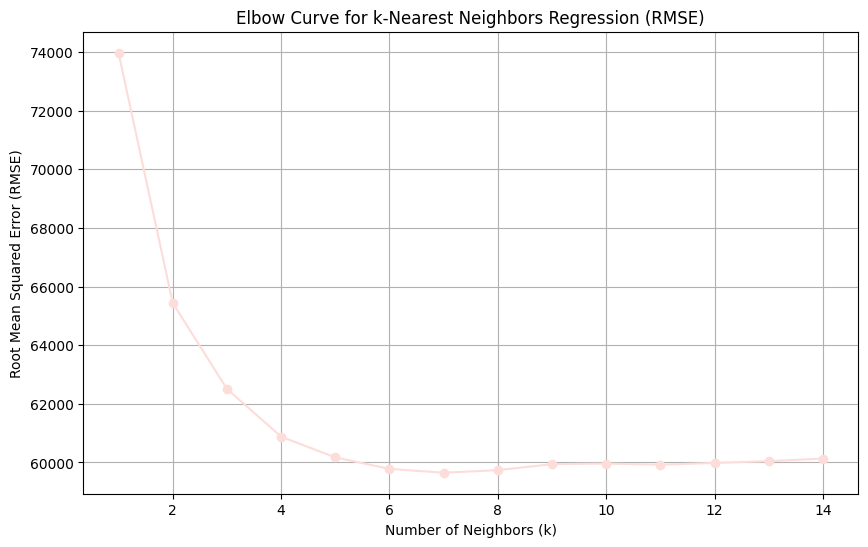

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), knn_rmses, marker='o')
plt.title('Elbow Curve for k-Nearest Neighbors Regression (RMSE)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()

# GRID SEARCH KNN


In [175]:
param_grid = {'n_neighbors': range(1, 30)}


# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_s, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred_grid = best_knn.predict(X_test_s)


Best Hyperparameters: {'n_neighbors': 11}


In [176]:
best_knn.score(X_test_s, y_test)

0.7306482377570549

# RANDOMIZED SEARCH KNN

In [177]:
from scipy.stats import randint

# Define the parameter distribution
param_dist = {'n_neighbors': randint(1, 30)}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, random_state=0)
random_search.fit(X_train_s, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters (Randomized Search):", best_params_random)

# Get the best model
best_knn_random = random_search.best_estimator_

# Make predictions on the test set
y_pred_random = best_knn_random.predict(X_test_s)



Best Hyperparameters (Randomized Search): {'n_neighbors': 8}


In [178]:
best_knn_random.score(X_test_s, y_test)

0.7323180432594305

# CROSS-VALIDATION

In [179]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [180]:
from sklearn.model_selection import cross_validate

# Assuming model is your regression model, and best_knn_random is your KNN model
folds = KFold(n_splits=7, shuffle=True, random_state=100)

# For the linear regression model
scoring_lr = {'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}
cv_results_lr = cross_validate(model, X_train_s, y_train, scoring=scoring_lr, cv=folds)

# For the KNN model
scoring_knn = {'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}
cv_results_knn = cross_validate(best_knn_random, X_train_s, y_train, scoring=scoring_knn, cv=folds)

# Extract the scores
scores_lr_r2 = cv_results_lr['test_r2']
scores_lr_mse = cv_results_lr['test_neg_mean_squared_error']

scores_knn_r2 = cv_results_knn['test_r2']
scores_knn_mse = cv_results_knn['test_neg_mean_squared_error']


In [181]:
print("Best R-squared in Linea:r" ,best_lr_r2)
print("Best RMSE in Linear:" ,lr_rmse)
print("Best R-squared in KNN:" ,best_knn_r2)
print("Best RMSE in KNN:" ,knn_rmse)

Best R-squared in Linea:r 0.6809870019937456
Best RMSE in Linear: 4249565399.352877
Best R-squared in KNN: 0.7313163279751095
Best RMSE in KNN: 60131.25712360223


In [182]:
best_lr_r2 = np.max(scores_lr_r2)
lr_rmse = -np.max(scores_lr_mse)
best_knn_r2 = np.max(scores_knn_r2)
knn_rmse = -np.max(scores_knn_mse)

# PLOTTING TWO MODELS

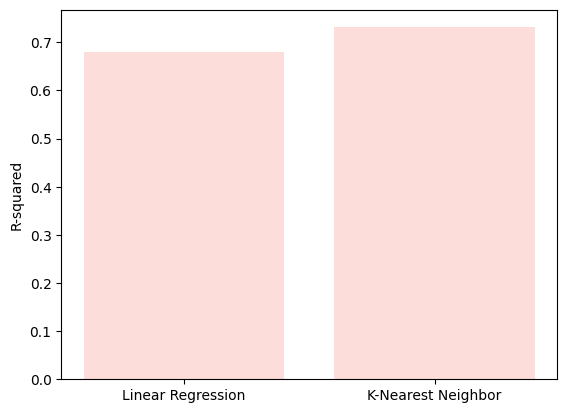

In [183]:
plt.bar(x=['Linear Regression' , 'K-Nearest Neighbor'] , height=[best_lr_r2, best_knn_r2])
plt.ylabel("R-squared")
plt.show() 

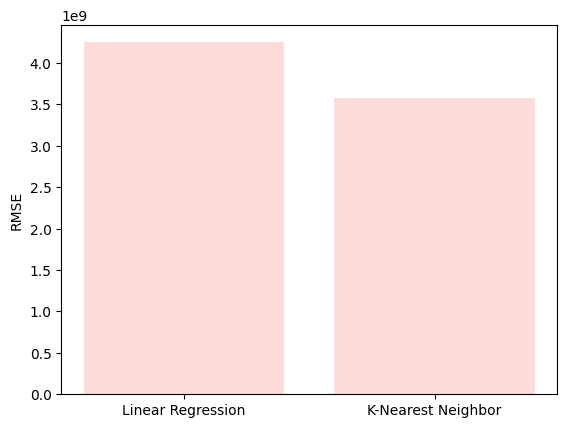

In [184]:
plt.bar(x=['Linear Regression' , 'K-Nearest Neighbor'] , height=[lr_rmse, knn_rmse])
plt.ylabel("RMSE")
plt.show() #shorter better